___

<a href='http://www.smartydreams.com'><img src='../smarty.PNG'/></a>
___
<center><em>Copyright Smarty-Dreams Author:Bryan Sierra Garcia</em></center>

In [21]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, Flatten
import numpy as np
import matplotlib.pyplot as plt
from PIL import Image 
import os

In [22]:
categorias = []
labels = []
imagenes = []

In [23]:
categorias = os.listdir('C:\\Users\\Hopewell\\Desktop\\Smarty-cuso_deep_learning\\datasets\\clasificador-imagenes1\\')

In [24]:
print(categorias)

['gato', 'perro']


In [25]:
x=0
for directorio in categorias:
    for imagen in os.listdir('C:\\Users\\Hopewell\\Desktop\\Smarty-cuso_deep_learning\\datasets\\clasificador-imagenes1\\'+directorio):
        img = Image.open('C:\\Users\\Hopewell\\Desktop\\Smarty-cuso_deep_learning\\datasets\\clasificador-imagenes1\\'+directorio+'\\'+imagen).resize((200,200))
        img = np.asarray(img)
        imagenes.append(img)
        labels.append(x)
    x += 1

In [26]:
print(labels)

[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1]


In [27]:
imagenes = np.asanyarray(imagenes)

In [28]:
imagenes.shape

(20, 200, 200, 3)

In [29]:
imagenes = imagenes[:,:,:,0]

In [30]:
imagenes.shape

(20, 200, 200)

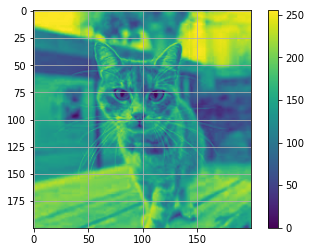

In [43]:
plt.show()
plt.imshow(imagenes[2])
plt.colorbar()
plt.autoscale()
plt.grid(True)
plt.show()


In [32]:
#model = tf.keras.models.Sequential([
#    tf.keras.layers.Flatten(input_shape=(200,200)),
#tf.keras.layers.Dense(128, activation='relu'),
#    tf.keras.layers.Dropout(0,2),
#    tf.keras.layers.Dense(10,activation='softmax')
#])

modelo=Sequential()
modelo.add(Flatten(input_shape=(200,200)))
modelo.add(Dense(128,activation='relu'))
modelo.add(Dropout(0.2))
modelo.add(Dense(10,activation='softmax'))
modelo.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten_1 (Flatten)          (None, 40000)             0         
_________________________________________________________________
dense_2 (Dense)              (None, 128)               5120128   
_________________________________________________________________
dropout_1 (Dropout)          (None, 128)               0         
_________________________________________________________________
dense_3 (Dense)              (None, 10)                1290      
Total params: 5,121,418
Trainable params: 5,121,418
Non-trainable params: 0
_________________________________________________________________


In [33]:
modelo.compile(optimizer='adam',
    loss='sparse_categorical_crossentropy',
    metrics=['accuracy'])

#modelo.compile(loss=keras.losses.categorical_crossentropy,optimizer=keras.optimizers.Adam(),metrics=['categorical_accuracy'])

In [34]:
labels = np.asarray(labels)

In [35]:
print(labels)

[0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 1 1 1 1]


In [36]:
modelo.fit(imagenes,labels,epochs=10)

Epoch 1/10
1/1 [==============================] - 0s 3ms/step - loss: 181.4760 - accuracy: 0.1500
Epoch 2/10
1/1 [==============================] - 0s 3ms/step - loss: 797.3859 - accuracy: 0.5500
Epoch 3/10
1/1 [==============================] - 0s 4ms/step - loss: 10908.9844 - accuracy: 0.5000
Epoch 4/10
1/1 [==============================] - 0s 3ms/step - loss: 8299.2344 - accuracy: 0.5000
Epoch 5/10
1/1 [==============================] - 0s 4ms/step - loss: 1336.7249 - accuracy: 0.6500
Epoch 6/10
1/1 [==============================] - 0s 3ms/step - loss: 6612.5732 - accuracy: 0.5000
Epoch 7/10
1/1 [==============================] - 0s 3ms/step - loss: 8380.4473 - accuracy: 0.5000
Epoch 8/10
1/1 [==============================] - 0s 2ms/step - loss: 5759.8955 - accuracy: 0.5500
Epoch 9/10
1/1 [==============================] - 0s 2ms/step - loss: 1922.1497 - accuracy: 0.5500
Epoch 10/10
1/1 [==============================] - 0s 3ms/step - loss: 1710.1488 - accuracy: 0.6000


## Evaluar red neuronal

In [37]:
im=0
im = Image.open('C:\\Users\\Hopewell\\Desktop\\Smarty-cuso_deep_learning\\Pruebas\\Imagenes\\prueba.jpg').resize((200,200))
im = np.asarray(im)
im = im[:,:,0]
im=np.array([im])
im.shape
test = im


## Realizar una prediccion

In [38]:
predict = modelo.predict(test)

In [39]:
print(predict)

[[1. 0. 0. 0. 0. 0. 0. 0. 0. 0.]]


In [40]:
categorias[np.argmax(predict[0])]

'gato'